# 1) Cargamos los datos 📕

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/GarganoNicolas/income/main/model/eph_tr.csv"
data = pd.read_csv(url, sep = ';')

In [3]:
data.head(5)

,edad,sexo,alfabeto,sistema_salud,nivel_educativo,ocupacion_jerarquia,estado_civil,ingreso
0,52,hombre,Si,No paga ni le descuentan,Superior Universitaria Completa,Cuenta propia,1,25000
1,43,hombre,Si,No paga ni le descuentan,Primaria Completa,Cuenta propia,4,23000
2,50,mujer,Si,Obra social (incluye PAMI),Secundaria Incompleta,Cuenta propia,1,3800
3,22,mujer,Si,Obra social (incluye PAMI),Secundaria Completa,Cuenta propia,3,8000
4,44,hombre,Si,Obra social (incluye PAMI),Secundaria Incompleta,Cuenta propia,4,18000


In [4]:
data = data.rename(columns={'ingreso_total_lab':'ingreso'})


In [5]:
data.columns

Index(['edad', 'sexo', 'alfabeto', 'sistema_salud', 'nivel_educativo',
       'ocupacion_jerarquia', 'estado_civil', 'ingreso'],
      dtype='object')

In [6]:
# Some columns are linear so you can replace data inside by numbers, like education
# I used to replace manualy, to set ir in the correct order
# Also, place of born is not lineal, and is better to make an OHE for it
# But because I dont trust in this df and I dont wanna expend to much time in it I use the iteration
# Before doing this I just tried get dummies, but was a complete desaster
# To see the clustering was horrible, it is better make numbers in the columns to see better de plot of the clusters


for columna in data:
    # Verificar si el tipo de dato es "object"
    if data[columna].dtype == 'object':
        # Obtener los valores únicos de la columna
        valores_unicos = data[columna].unique()

        # Imprimir los valores únicos de la columna con números secuenciales
        print(f"Valores únicos de la columna {columna}:")
        if len(valores_unicos) < 42:
            for indice, valor in enumerate(valores_unicos):
                print(f"{indice}. {valor}")
        print()

Valores únicos de la columna sexo:
0. hombre
1. mujer

Valores únicos de la columna alfabeto:
0. Si
1. No

Valores únicos de la columna sistema_salud:
0. No paga ni le descuentan
1. Obra social (incluye PAMI)
2. Obra social y mutual/prepaga/servicio de emergencia.
3. Mutual / Prepaga / Servicio de emergencia
4. Planes y seguros públicos
5. Ns./Nr.
6. Mutual/prepaga/servicio de emergencia/ Planes y Seguros Públicos

Valores únicos de la columna nivel_educativo:
0. Superior Universitaria Completa
1. Primaria Completa
2. Secundaria Incompleta
3. Secundaria Completa
4. Primaria Incompleta(incluye educación especial)
5. Superior Universitaria Incompleta
6. Sin instrucción

Valores únicos de la columna ocupacion_jerarquia:
0. Cuenta propia
1. Director
2. otro
3. Trabajador asalariado



In [7]:
data1 = data.copy()

# Iterar sobre las columnas del DataFrame
for columna in data1:
    # Verificar si el tipo de dato es "object"
    if data1[columna].dtype == 'object':
        # Obtener los valores únicos de la columna
        valores_unicos = data1[columna].unique()
        if len(valores_unicos) < 42:
            # Crear un diccionario de reemplazo
            diccionario_reemplazo = {valor: indice for indice, valor in enumerate(valores_unicos)}

            # Reemplazar los valores en la columna
            data1[columna] = data1[columna].map(diccionario_reemplazo)

# Imprimir el DataFrame con los valores reemplazados
print(data1)

      edad  sexo  alfabeto  sistema_salud  nivel_educativo  \
0       52     0         0              0                0   
1       43     0         0              0                1   
2       50     1         0              1                2   
3       22     1         0              1                3   
4       44     0         0              1                2   
...    ...   ...       ...            ...              ...   
2456    27     0         0              0                3   
2457    48     0         0              1                0   
2458    44     0         0              0                2   
2459    50     1         0              0                1   
2460    40     0         0              3                3   

      ocupacion_jerarquia  estado_civil  ingreso  
0                       0             1    25000  
1                       0             4    23000  
2                       0             1     3800  
3                       0             3     8000  


In [8]:
data = data1

# 4) Regresión 🤑

### 4.1) Análisis exploratorio de datos (AED)

Histogramas de las variables:

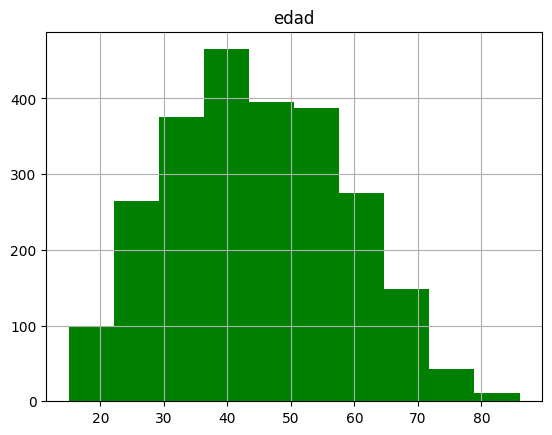

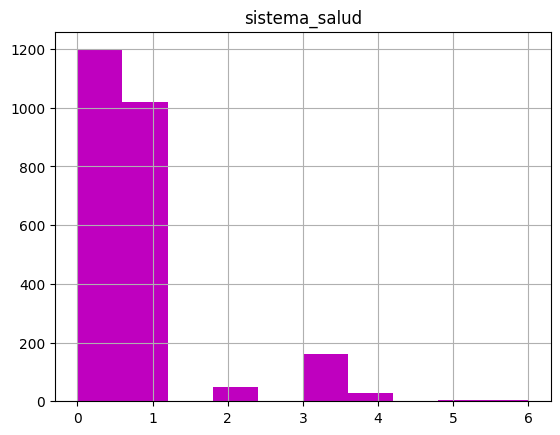

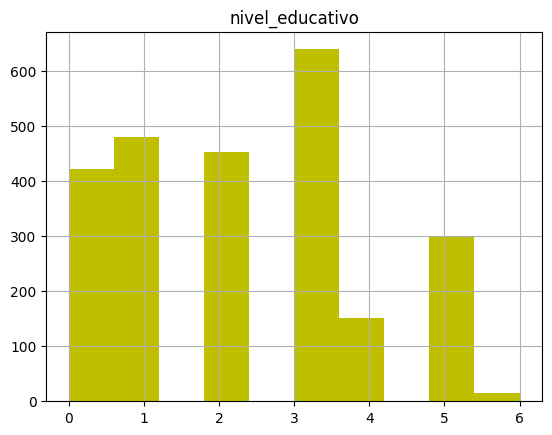

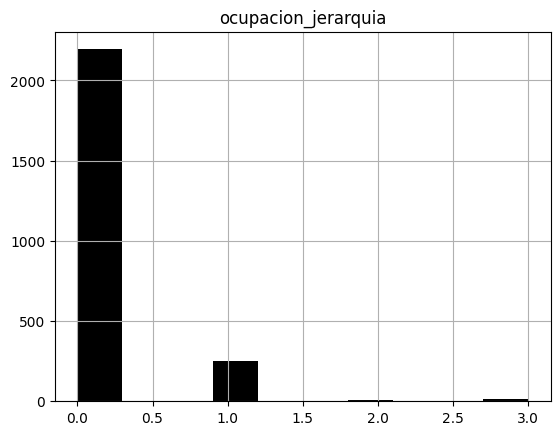

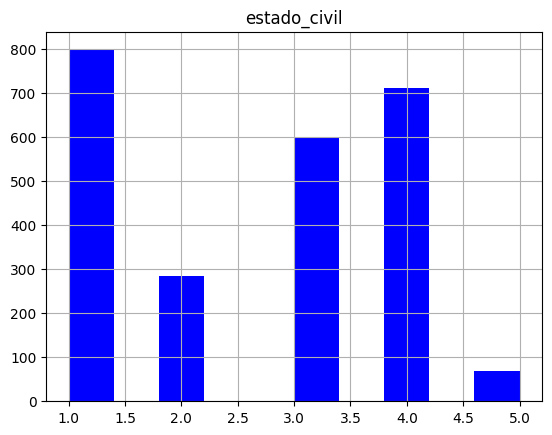

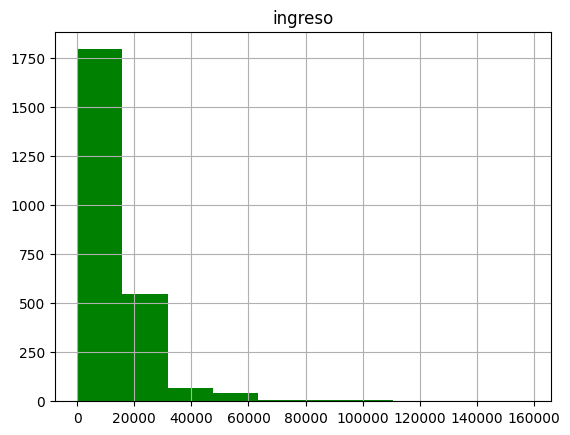

In [9]:
import matplotlib.pyplot as plt

# List of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Get the DataFrame columns
cols = data.columns

# Loop over the DataFrame columns
for i, col in enumerate(cols, start=1):
    # Check if the column has more than 2 unique values
    if data[col].nunique() > 2:
        # Create a new subplot for each column
        fig, ax = plt.subplots()
        # Plot the histogram for the column
        data[col].hist(ax=ax, color=colors[i % len(colors)])  # Use a color from the list
        ax.set_title(col)  # Set the title of the histogram to the column name
        plt.show()

### 4.2) Separación TR/TS

In [10]:
x_data_reg = data.drop('ingreso', axis=1)
y_data_reg = data['ingreso']

Obtenemos los valores del dataframe, para evitar el siguiente warning más adelante.
<br>UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names.

In [11]:
x_data_reg = x_data_reg.values
y_data_reg = y_data_reg.values

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data_reg, y_data_reg, test_size=0.3)

### 4.3) Creación del modelo de regresión lineal

In [13]:
from sklearn.linear_model import LinearRegression

# a.Creamos modelo
model = LinearRegression()

# b. fiteamos
model.fit(x_train, y_train)

# c. obtenemos predicciónes para tr y ts
pred_tr=model.predict(x_train)
pred_ts=model.predict(x_test)

In [14]:
pred_tr[0:5]

array([16035.25730479, 11752.805442  ,  9896.02705712, 18124.25743303,
       12141.81074221])

**Nota:** No hay parámetros

### 4.4) Creación del RF con hypertuning (usando grid search)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

In [16]:
params = {
    'n_estimators' : [10, 20, 500, 5000],
    'max_features': [50, 100],
    #'bootstrap': [False, True],
    #'max_depth': [50, 500],
    #'min_samples_leaf': [3, 50],
    #'min_samples_split': [10, 50],
}

grid_rf = GridSearchCV(estimator = model_rf,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5,
                        verbose = 1
                        )

Actualmente hay un conflicto de procesamiento en paralelo con GridSearchCV, por eso no se recomienda el uso de n_paralel.

Esta celda toma algunos minutos (aprox 10 min), mientras tanto espera el resultado con un café o mate 😎

In [17]:
grid_rf.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [50, 100],
                         'n_estimators': [10, 20, 500, 5000]},
             scoring='neg_mean_absolute_error', verbose=1)

In [18]:
grid_rf.best_estimator_

RandomForestRegressor(max_features=100, n_estimators=5000)

Predicción de casos nuevos:

In [19]:
grid_rf.predict(x_train)
grid_rf.predict(x_test)

array([57613.17904762, 13906.49793651,  9271.25813492, 16825.45095238,
       10505.9631746 , 13561.2107619 ,  6378.36367965, 19165.27095238,
        5256.93690476, 23311.56666667, 14558.05119048, 11580.39764791,
       24064.295     , 14351.57333333,  6669.36937951,  5390.09195238,
       16219.704     ,  5717.08634921,  9275.04526984, 21415.71166667,
        9821.33436508, 20809.6947619 ,  4875.9885348 ,  4819.02587224,
       12096.64445527,  8786.01585859, 23569.5247619 ,  9820.138     ,
       33148.136     ,  2235.2690873 , 12631.4397619 ,  8290.64885714,
        7159.8315873 ,  6042.40333333, 11956.15967532, 12919.72876623,
       11877.93411977,  5333.36533333,  3253.17904762, 15316.91742063,
        7266.59447619, 18374.28809524,  9087.21533333,  9820.138     ,
        7678.13485714, 13205.33222222, 14052.60577756, 23822.98      ,
       22342.86328283, 22791.59190476, 39466.96666667,  6438.01638095,
       15519.28018759, 10723.21285714,  2956.1       ,  4717.4331746 ,
      

### 4.5) Análisis de las métricas de error

**NOTA:** neg_mean_absolute_error más cercano a 0 es mucho mejor.

In [20]:
pd.concat([pd.DataFrame(grid_rf.cv_results_["params"]),
           pd.DataFrame(grid_rf.cv_results_["mean_test_score"],
                        columns=["neg_mean_absolute_error"])],axis=1).sort_values('neg_mean_absolute_error', ascending=False)

,max_features,n_estimators,neg_mean_absolute_error
7,100,5000,-7904.593091
3,50,5000,-7905.157809
6,100,500,-7905.608075
2,50,500,-7929.317474
1,50,20,-7998.026815
0,50,10,-8023.157478
5,100,20,-8053.456896
4,100,10,-8138.471469


Análisis métrica TR vs TS:

In [21]:
grid_rf.score(x_train, y_train)

-3488.2171255039575

In [22]:
grid_rf.score(x_test, y_test)

-7464.075524558937

Links útiles:

- Para investigar más de `gridsearch`: [Hyperparameter Tuning the Random Forest in Python](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74).
- Doc oficial [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

### 4.6) Gráfico de la curva del error

**Gráfico de prediction error**

- Linea gris: Lo que nos gustaría que fuera
- Linea negra: El ajuste de regresión, de la regresión misma

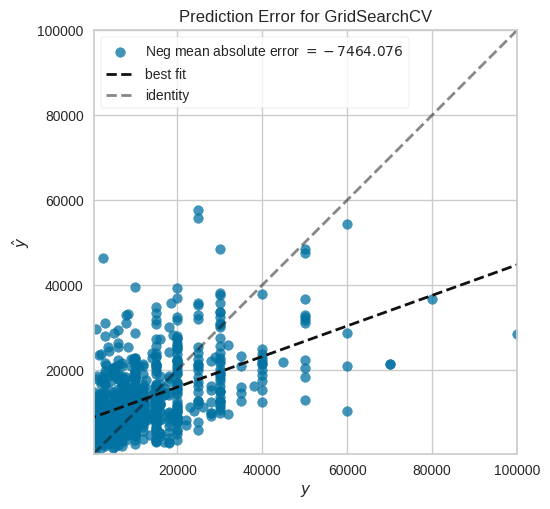

<Axes: title={'center': 'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [23]:
from yellowbrick.regressor import PredictionError

vis_pred_err = PredictionError(grid_rf)

vis_pred_err.fit(x_train, y_train)  # Fiteamos los datos al visualizador
vis_pred_err.score(x_test, y_test)  # Calculamos las métricas para test
vis_pred_err.show()                 # Visualizamos!

In [24]:
print("Training data shape:", x_train.shape)
print("Prediction data shape:", y_test.shape)

Training data shape: (1722, 7)
Prediction data shape: (739,)


# GO BACK TO STUDY REGRESION!
![](https://media.giphy.com/media/EvNfyRC5HMVzi/giphy.gif)

**Gráfico de residuos**

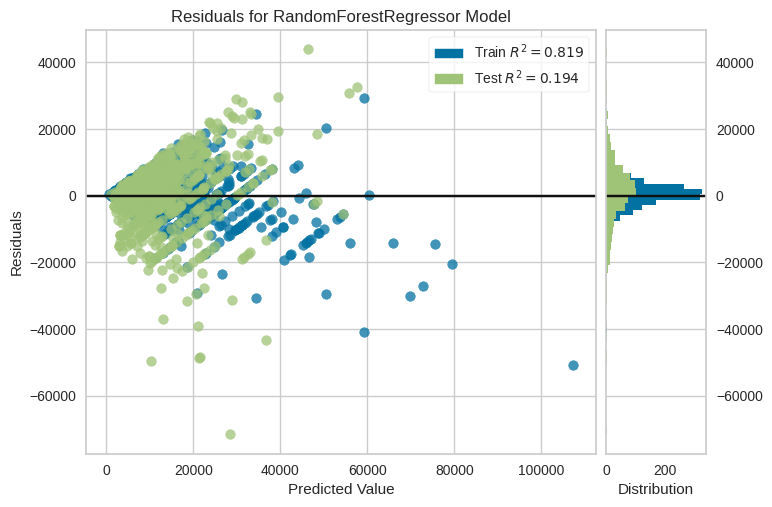

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [25]:
from yellowbrick.regressor import ResidualsPlot

# ojo: poner best_estimator_
vis_res = ResidualsPlot(grid_rf.best_estimator_)


# Copy-paste de la doc oficial:
vis_res.fit(x_train, y_train)  # Fiteamos los datos al visualizador
vis_res.score(x_test, y_test)  # Calculamos las métricas para test
vis_res.show()                 # Visualizamos!

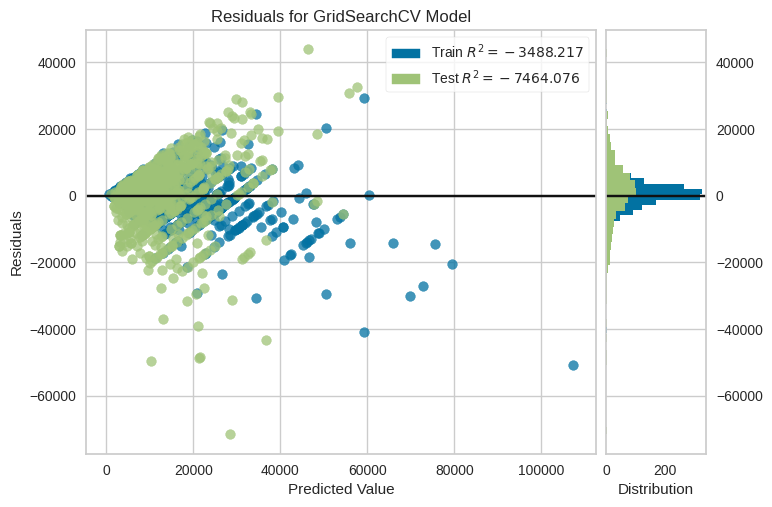

<Axes: title={'center': 'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [26]:
vis_res2 = ResidualsPlot(grid_rf)

# Copy-paste de la doc oficial: https://www.scikit-yb.org/en/latest/quickstart.html
vis_res2.fit(x_train, y_train)  # Fiteamos los datos al visualizador
vis_res2.score(x_test, y_test)  # Calculamos las métricas para test
vis_res2.show()                 # Visualizamos!

Doc oficial: https://www.scikit-yb.org/en/latest/quickstart.html

# 5) Guardar un modelo

Vamos a guardar el modelo de clasificación

In [40]:
import pickle

In [41]:
# Guardar en el disco
filename = 'model1.pkl'
pickle.dump(grid_rf, open(filename, 'wb')) # rf = nuestro modelo

In [29]:
# Lo cargamos para usarlo en otro momento.
#rf_loaded = pickle.load(open(filename, 'rb'))

## 6) Clustering

In [30]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(data)
x_data_norm=std_scaler.transform(data)

pd.DataFrame(x_data_norm).describe()

,0,1,2,3,4,5,6,7
count,2.461000e+03,2.461000e+03,2.461000e+03,2.461000e+03,2.461000e+03,2.461000e+03,2.461000e+03,2.461000e+03
mean,1.515786e-16,3.753375e-17,3.464654e-17,-8.950355e-17,-7.506750e-17,-5.774423e-17,7.145848e-17,6.207505e-17
std,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00
min,-2.203960e+00,-7.473830e-01,-8.820719e-02,-7.747134e-01,-1.405302e+00,-3.220502e-01,-1.234031e+00,-1.047223e+00
25%,-7.958553e-01,-7.473830e-01,-8.820719e-02,-7.747134e-01,-7.755770e-01,-3.220502e-01,-1.234031e+00,-6.436342e-01
50%,-5.474742e-02,-7.473830e-01,-8.820719e-02,3.210163e-01,-1.458525e-01,-3.220502e-01,3.281863e-01,-2.318090e-01
75%,7.604712e-01,1.338002e+00,-8.820719e-02,3.210163e-01,4.838720e-01,-3.220502e-01,1.109295e+00,3.447463e-01
max,3.057906e+00,1.338002e+00,1.133694e+01,5.799665e+00,2.373046e+00,7.656798e+00,1.890404e+00,1.195822e+01


In [31]:
# Crear Modelo
from sklearn.cluster import KMeans

cl_model = KMeans(
    n_clusters=7,
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100,
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model.fit(x_data_norm)

KMeans(max_iter=100, n_clusters=7, n_init='auto', random_state=0)

In [32]:
pred_cl = cl_model.predict(x_data_norm)

# Número de cluster:
pred_cl

array([4, 2, 0, ..., 4, 0, 1], dtype=int32)

In [33]:
cl_model

KMeans(max_iter=100, n_clusters=7, n_init='auto', random_state=0)

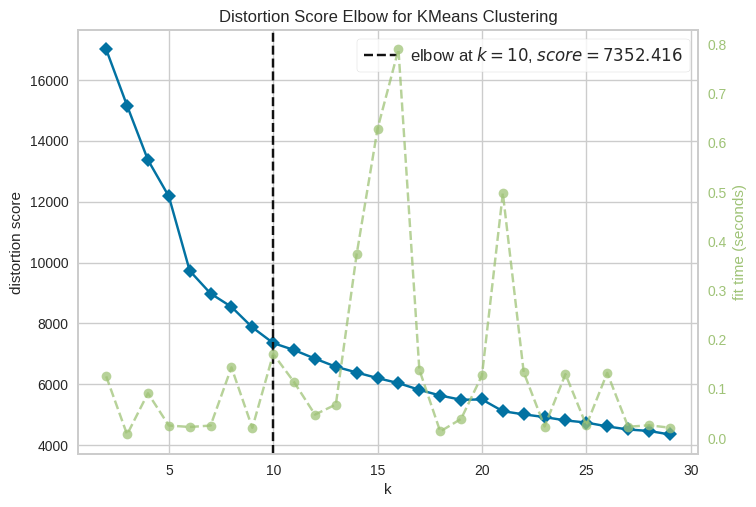

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=100, n_clusters=29, n_init='auto',
                                  random_state=0),
                 k=(2, 30))

In [34]:
from copy import deepcopy
from yellowbrick.cluster.elbow import kelbow_visualizer

cl_model2=deepcopy(cl_model) # ojo

kelbow_visualizer(cl_model2, x_data_norm, k=(2,30), locate_elbow=True)

In [35]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl=data.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl[cluster_var]=cl_model.predict(x_data_norm) # ojo aca! el predict es de los datos normalizados
x_data_cl.head()

,edad,sexo,alfabeto,sistema_salud,nivel_educativo,ocupacion_jerarquia,estado_civil,ingreso,cluster
0,52,0,0,0,0,0,1,25000,4
1,43,0,0,0,1,0,4,23000,2
2,50,1,0,1,2,0,1,3800,0
3,22,1,0,1,3,0,3,8000,6
4,44,0,0,1,2,0,4,18000,2


In [36]:
%%capture
%pip install funpymodeling

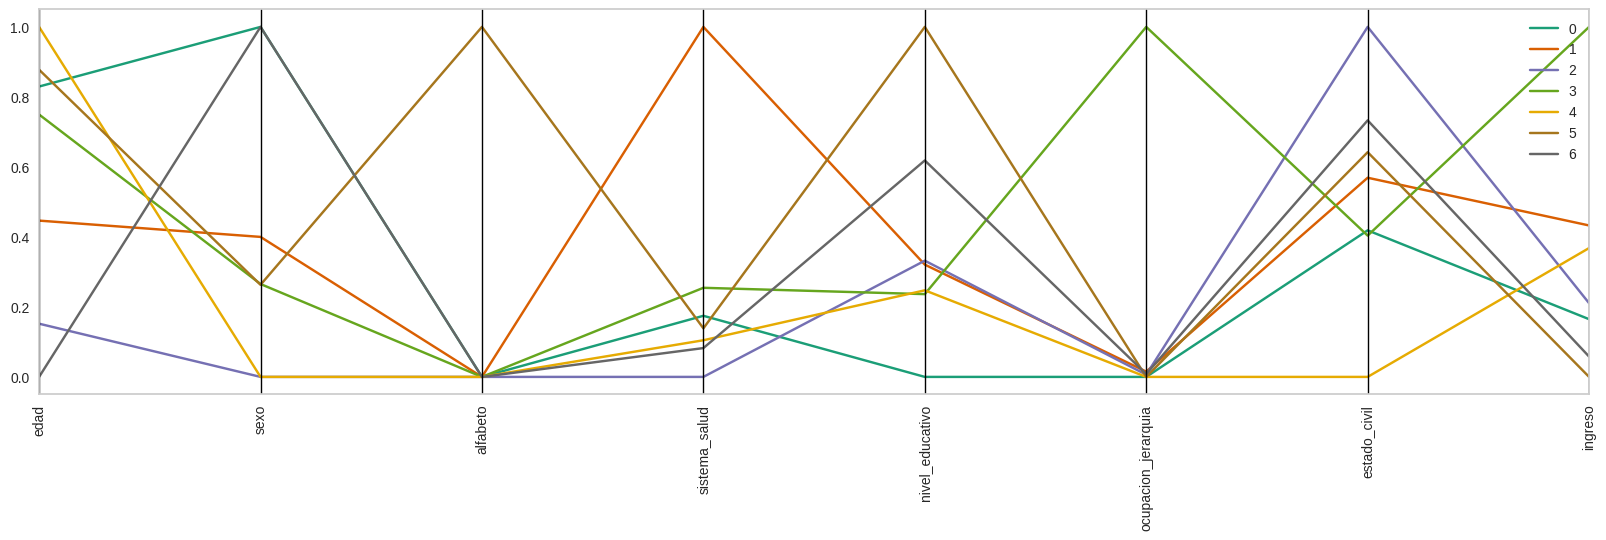

In [37]:
plt.figure(figsize=(20, 5))
from funpymodeling.model_validation import coord_plot
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)